In [ ]:
### Before running this code, make sure to instal ffmpeg and set path to the file location on windows.

In [1]:
pip install pydub

  Using cached pydub-0.24.1-py2.py3-none-any.whl (30 kB)



In [228]:
# Import libraries
import matplotlib.pyplot as plt
import os
import pydub
import numpy as np
import librosa
import librosa.display
import time
from openpyxl import load_workbook

In [5]:
# Load xlsx file containing path names of validated audio samples
samples = load_workbook (r'G:/School/Validated_Samples.xlsx')

In [233]:
# Function for converting MP3 files to np array
def read(file):
    audio = pydub.AudioSegment.from_mp3(file)
    audio_array = np.array(audio.get_array_of_samples())
    if audio.channels == 2:
        audio_array = audio_array.reshape((-1, 2))
    
    return audio.frame_rate, np.float32(audio_array) / 2**15

# Function for iterating through audio samples
def audio2specto(samples, fpath, final_loc, fft=299, hop=960, input_check=150, rotate=True):
    fpath_clips = fpath + '/clips'
    lastrow = samples['Validated_Samples'].max_row
    range_array = np.array(range(2,lastrow + 1))
    
    np.random.seed(50)
    np.random.shuffle(range_array)
    
    n = 2
    time_length = []
    for i in range_array:
        start_time = time.time()
        # Get name of audio file
        file_name = samples['Validated_Samples'].cell(row=i, column=2).value
        audio_path = os.path.join(fpath_clips, file_name)
        
        # Convert audio file into numpy array and obtain sample rate
        sr, x = read(audio_path)
        
        # Apply Fourier Transform 
        fft_temp = fft
        while True:
            X = librosa.stft(x,n_fft=fft,hop_length=hop)
            Xdb = librosa.amplitude_to_db(abs(X))
            if Xdb.shape[0] == input_check:
                fft = fft_temp
                break
            else:
                print(Xdb.shape[0])
                fft -= 1
        
        # Save numpy array
        percent = int(n / lastrow * 100)
        if percent < 70:
            last_loc = 'train'
        elif percent > 84:
            last_loc = 'test'
        else:
            last_loc = 'val'
        if rotate:
            Xdb = np.rot90(Xdb, 3)
        np.save(fpath + '/' + final_loc + '/' + last_loc + '/' + file_name, Xdb)
        
        # Count iteration
        n += 1
        
        # Print progress
        end_time = time.time()
        time_length.append(end_time - start_time)
        predicted_time = int(((sum(time_length) / len(time_length))*(lastrow - n)) / 60)
        print(f'{percent}% Complete, Time left: {predicted_time} min(s)\r', end="")

In [223]:
fpath = 'G:/School'
final_loc = 'specto150'
audio2specto(samples, fpath, final_loc)

In [232]:
final_loc = 'specto100'
audio2specto(samples, fpath, final_loc, fft=199, input_check=100)

In [ ]:
final_loc = 'specto50'
audio2specto(samples, fpath, final_loc, fft=99, input_check=50)

common_voice_en_19647545.mp3


4.584

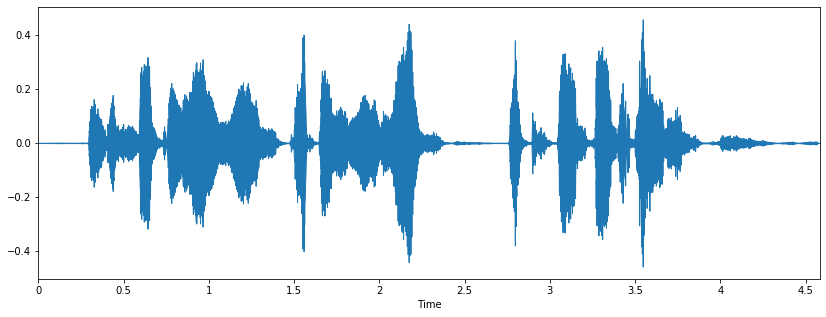

In [187]:
file_name = samples['Validated_Samples'].cell(row=2, column=2).value
print(file_name)
audio_path = os.path.join(fpath_clips, file_name)
sr, x = read(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
librosa.get_duration(y=x, sr=sr)

(100, 230)


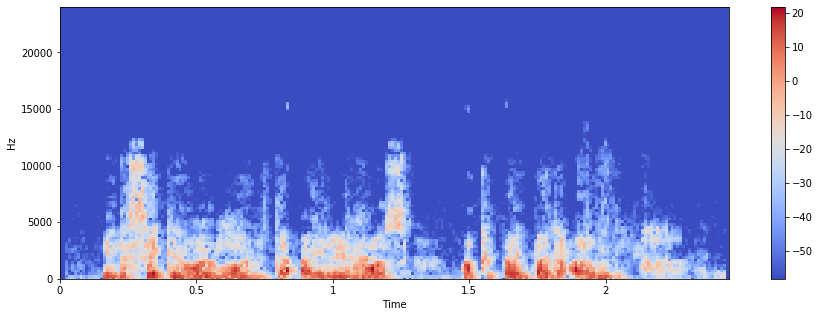

In [194]:
X = librosa.stft(x,n_fft=199,hop_length=960)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
print(Xdb.shape)

[[-58.229286 -58.229286 -58.229286 ... -58.229286 -58.229286 -58.229286]
 [-58.229286 -58.229286 -58.229286 ... -58.229286 -58.229286 -58.229286]
 [-58.229286 -58.229286 -58.229286 ... -39.091667 -47.49372  -35.162178]
 ...
 [-58.229286 -58.229286 -58.229286 ... -23.523634 -18.960102 -21.677052]
 [-58.229286 -58.229286 -58.229286 ... -16.01177  -12.96118  -24.042667]
 [-58.229286 -58.229286 -58.229286 ... -58.229286 -58.229286 -58.229286]]


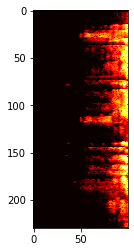

In [195]:
Xdb_temp = np.rot90(Xdb, 3)
print(Xdb_temp)
plt.imshow(Xdb_temp, cmap='hot', interpolation='nearest')
# ax = plt.gca()
# ax.invert_xaxis()
plt.show()

common_voice_en_1164.mp3


6.984

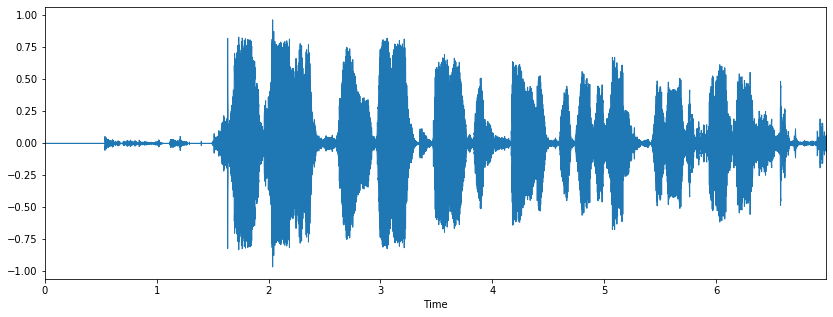

In [175]:
file_name = samples['Validated_Samples'].cell(row=3, column=2).value
print(file_name)
audio_path = os.path.join(fpath_clips, file_name)
sr, x = read(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
librosa.get_duration(y=x, sr=sr)

(150, 350)


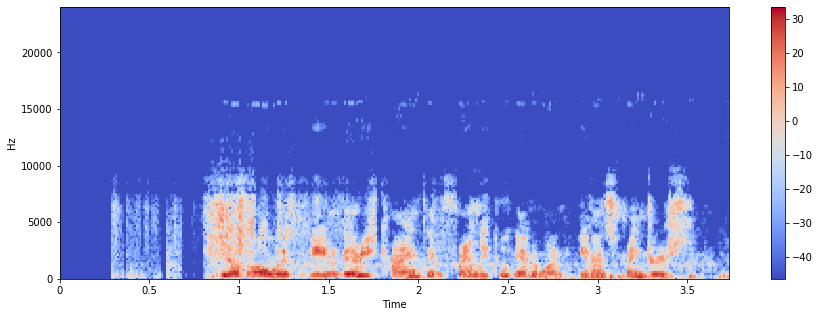

In [123]:
X = librosa.stft(x,n_fft=299,hop_length=960)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
print(Xdb.shape)